# Cell phone dataset analysis
by Avery Ali

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/aeali/Documents/Cell Phone data python project/Data files/Cellphone.csv')

In [3]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [22]:
df.describe()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [6]:
#Check for nulls
df.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [7]:
#check for duplicates
df.duplicated().sum()

0

In [8]:
#check for missing values
df.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

We do not need the product id column.

In [9]:
df.drop('Product_id', inplace = True, axis = 1)

## Exploratory analysis

In [10]:
#Find the phone with the highest price
max_price = df['Price'].max()
df.query('Price == @max_price')


,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
152,4361,3248,238.0,5.7,515,8,1.95,128.0,6.0,12.0,8.0,7000,7.4
153,4361,3291,238.0,5.7,515,8,1.95,128.0,6.0,12.0,8.0,7000,7.4


In [11]:
#Phone with the lowest price
min_price = df['Price'].min()
df.query('Price == @min_price')

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
149,614,2159,69.8,1.4,129,0,0.0,0.0,0.004,0.0,0.0,800,14.1
150,614,2171,69.8,1.4,129,0,0.0,0.0,0.004,0.0,0.0,800,14.1


In [12]:
#Check basic correlation with price value
df.corr()['Price'].sort_values(ascending = False)

Price           1.000000
ram             0.896915
ppi             0.817614
internal mem    0.776738
RearCam         0.739538
cpu freq        0.727383
cpu core        0.686811
Front_Cam       0.675286
battery         0.559946
resoloution     0.404010
Sale            0.273263
weight          0.144555
thickness      -0.716773
Name: Price, dtype: float64

We can see positive correlations in price with ram, ppi, and internal memory. The property of thickness has negative correlation to price values, while weight has little to no correlation to the price of the phone.

Lets take a look at a heat map of these correlation values.

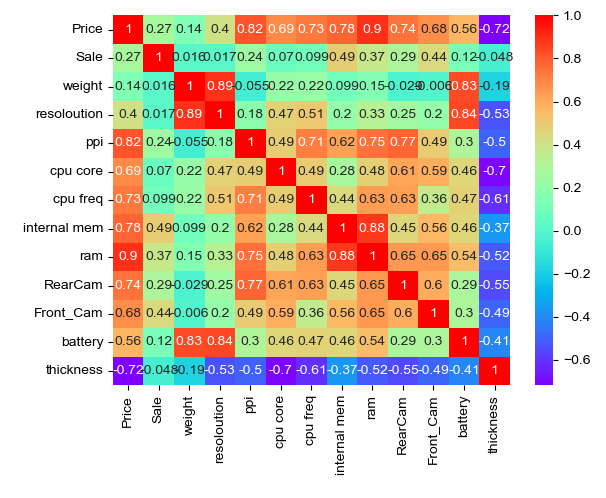

In [13]:
#heat map
sb.heatmap(df.corr(), annot = True, cmap = 'rainbow')
sb.set(rc={'figure.figsize':(12,8.27)}) # resize figure

In [14]:
#sb.pairplot(df)

Lets take a look at some univariate analysis. Lets see the density of each phone property.

In [19]:
str(df.columns)

"Index(['Price', 'Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq',\n       'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],\n      dtype='object')"

In [20]:
columns = ['Price', 'Sale', 'weight', 'resoloution', 'ppi','cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam','battery', 'thickness']

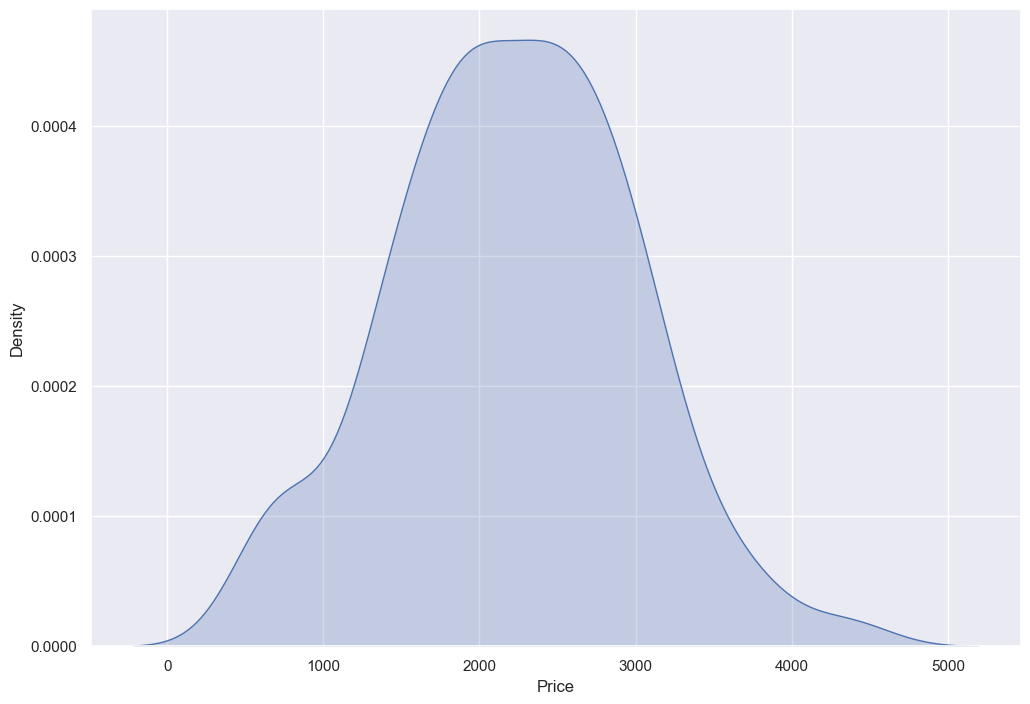

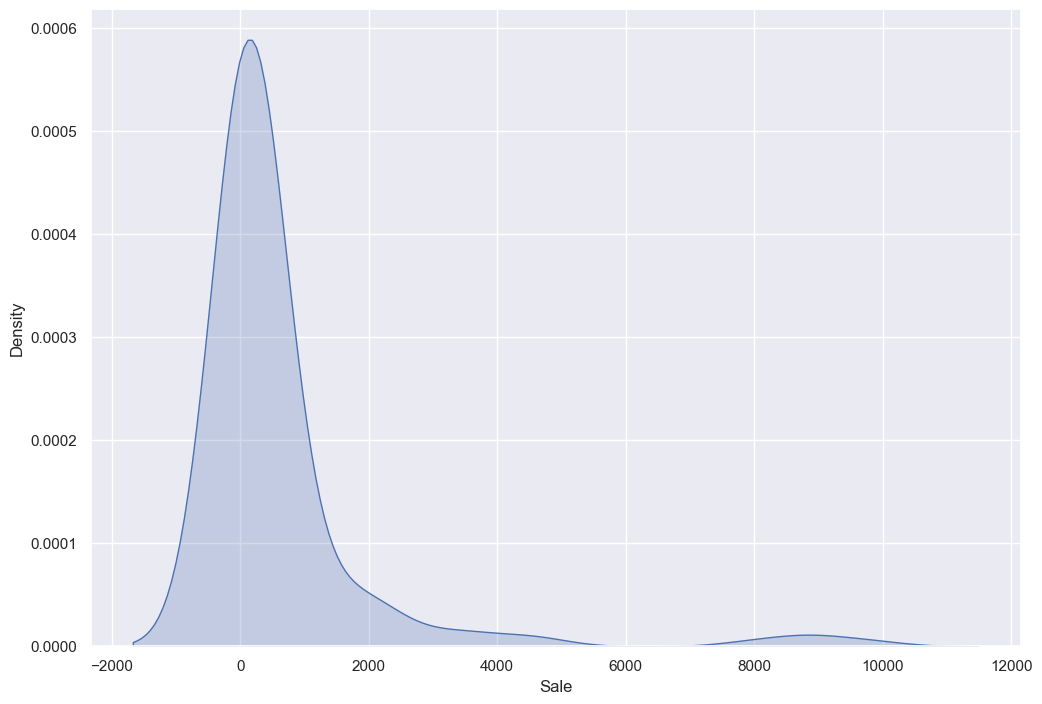

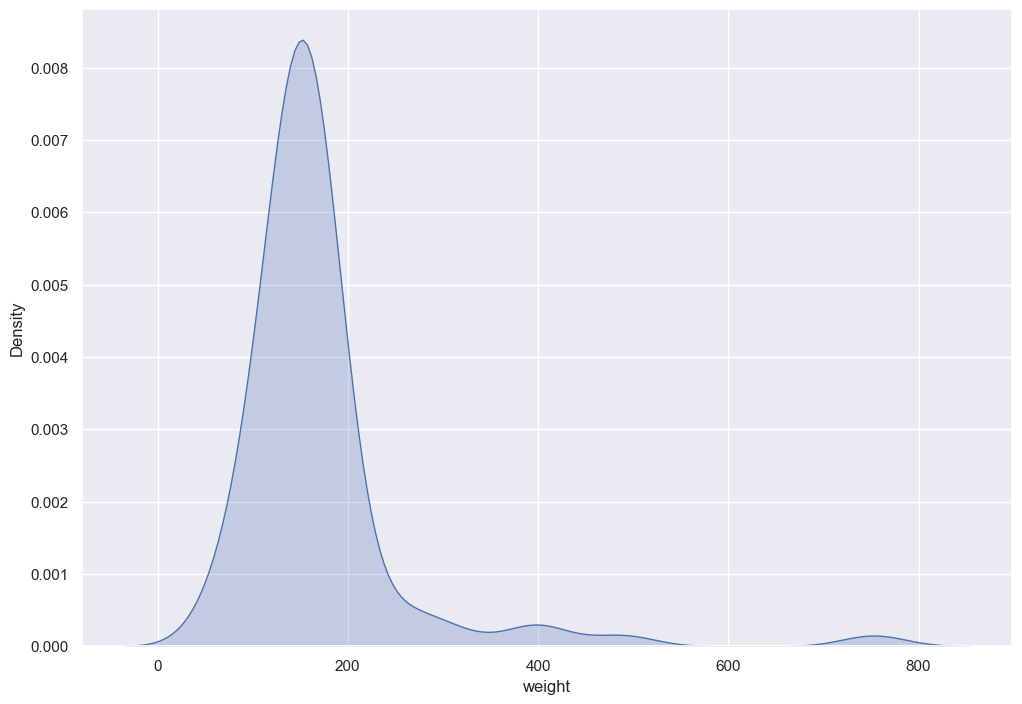

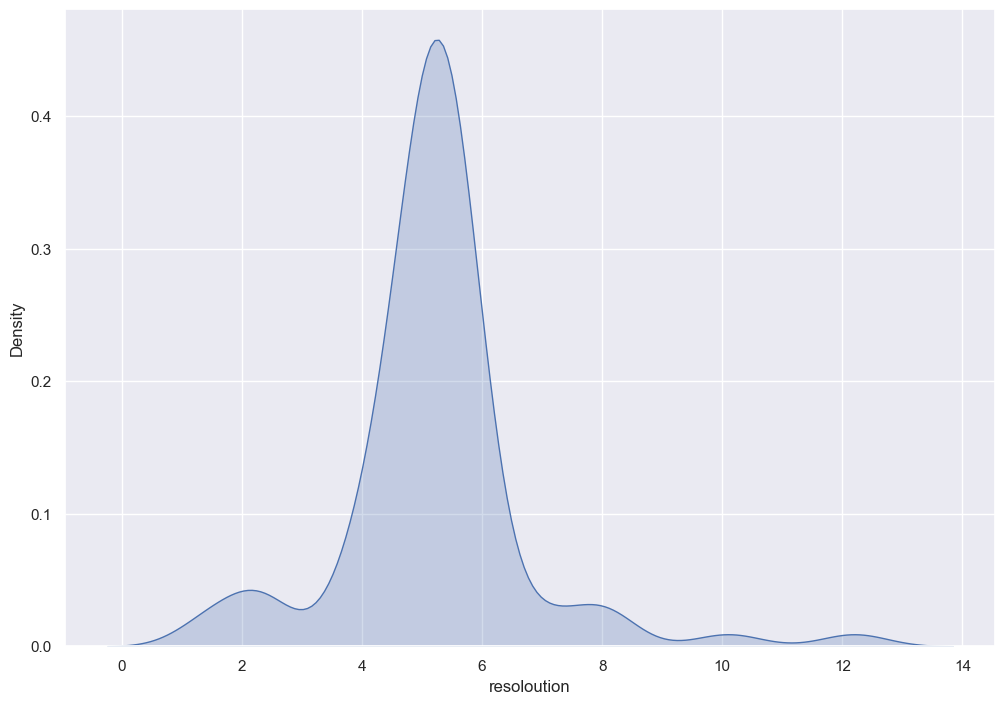

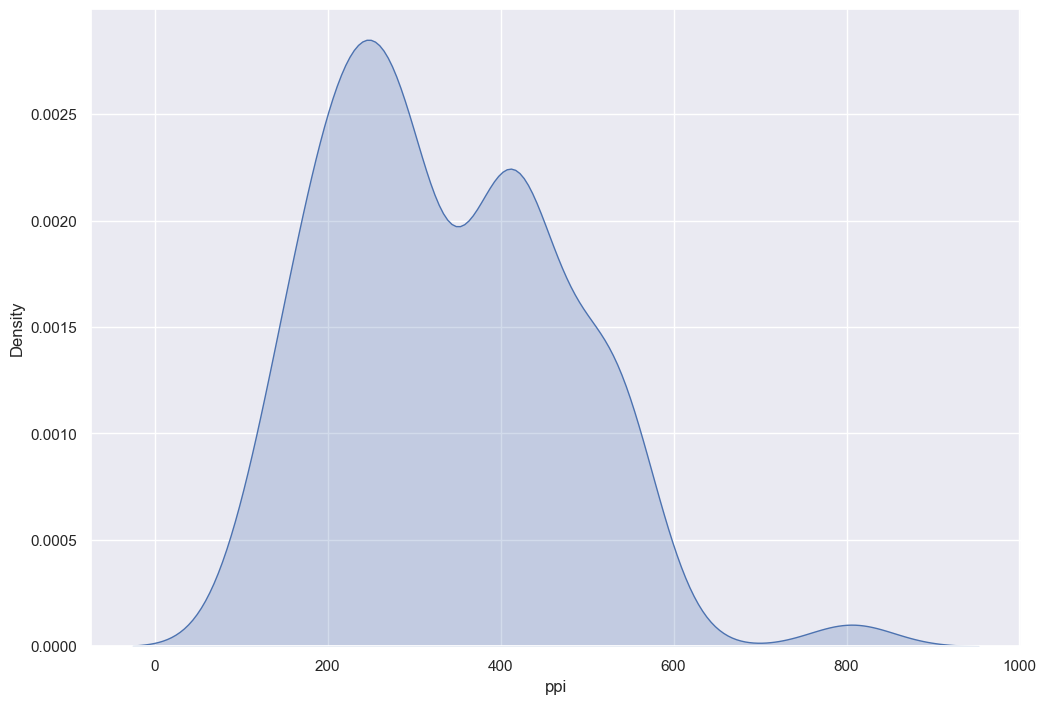

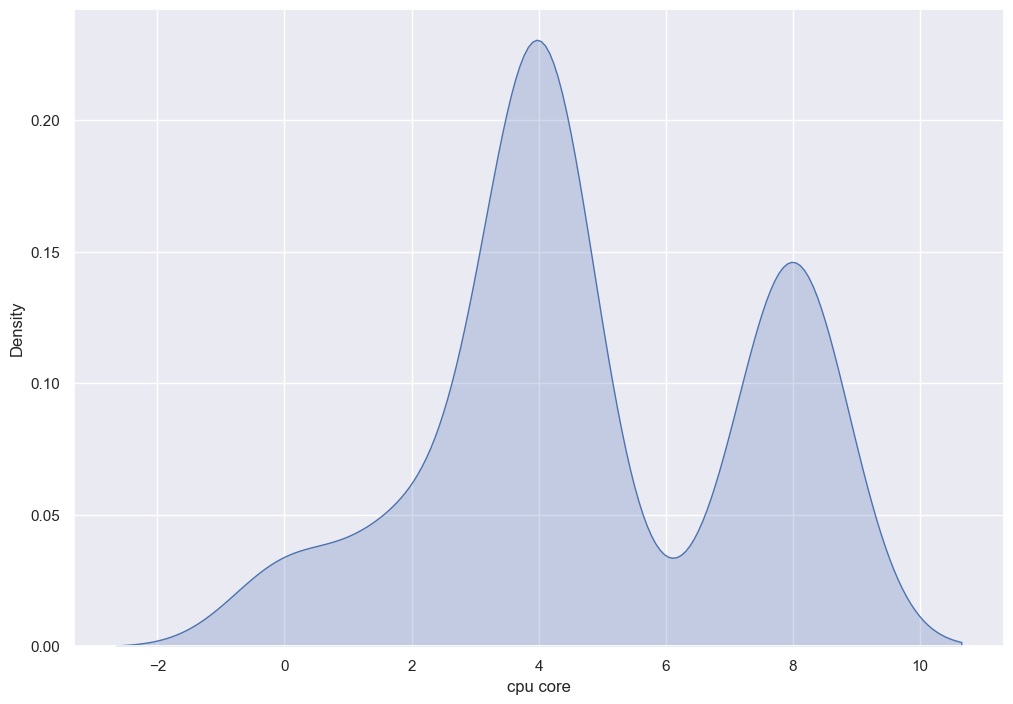

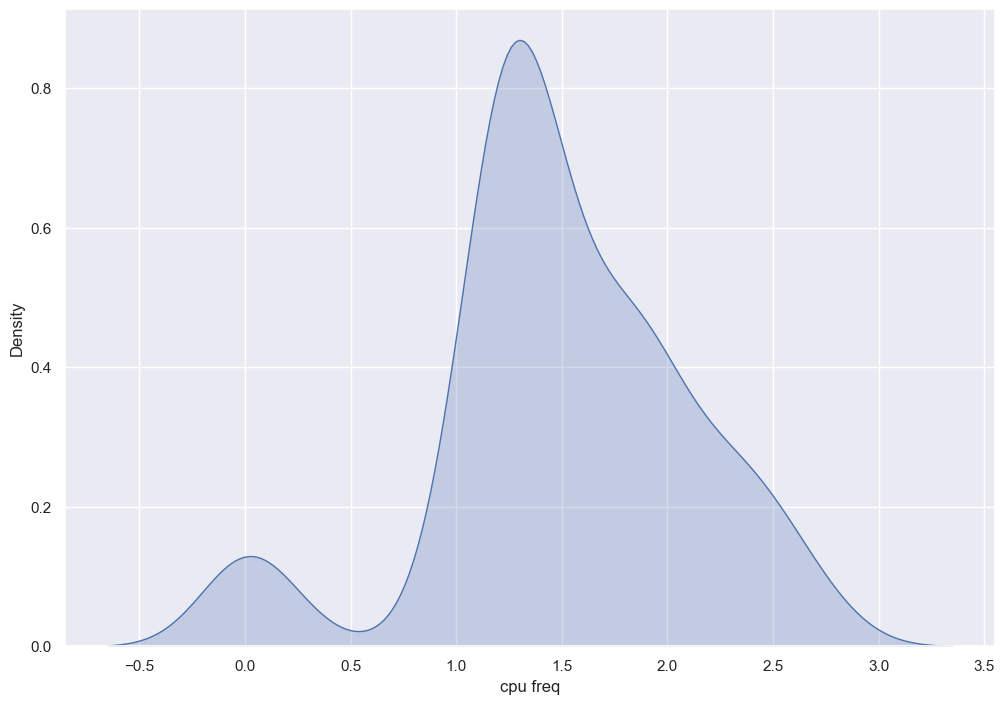

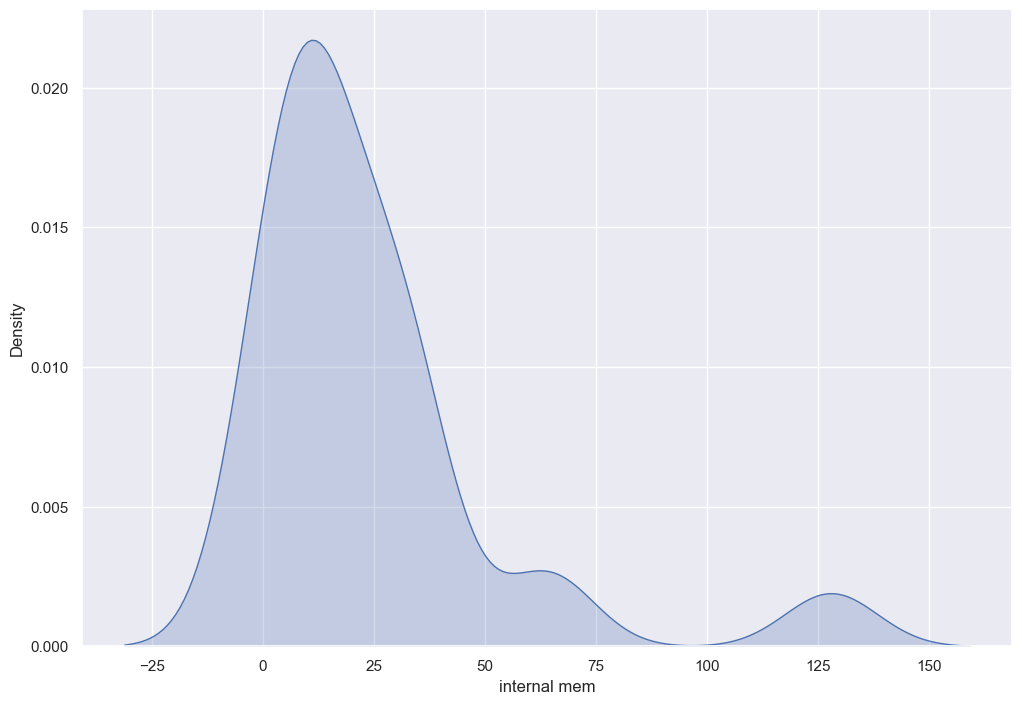

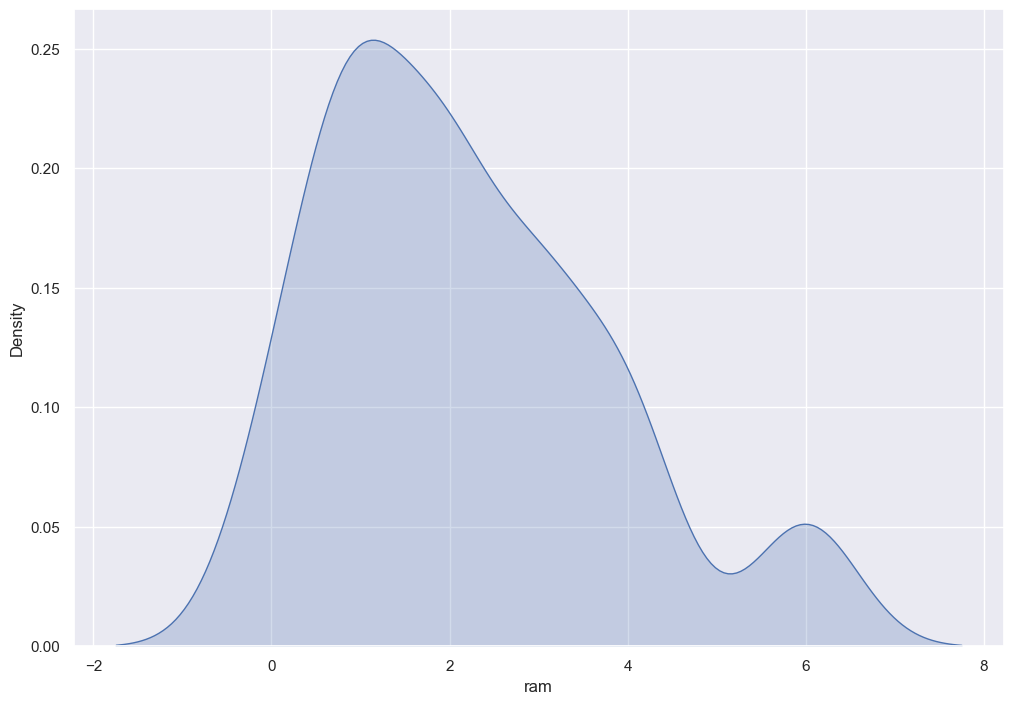

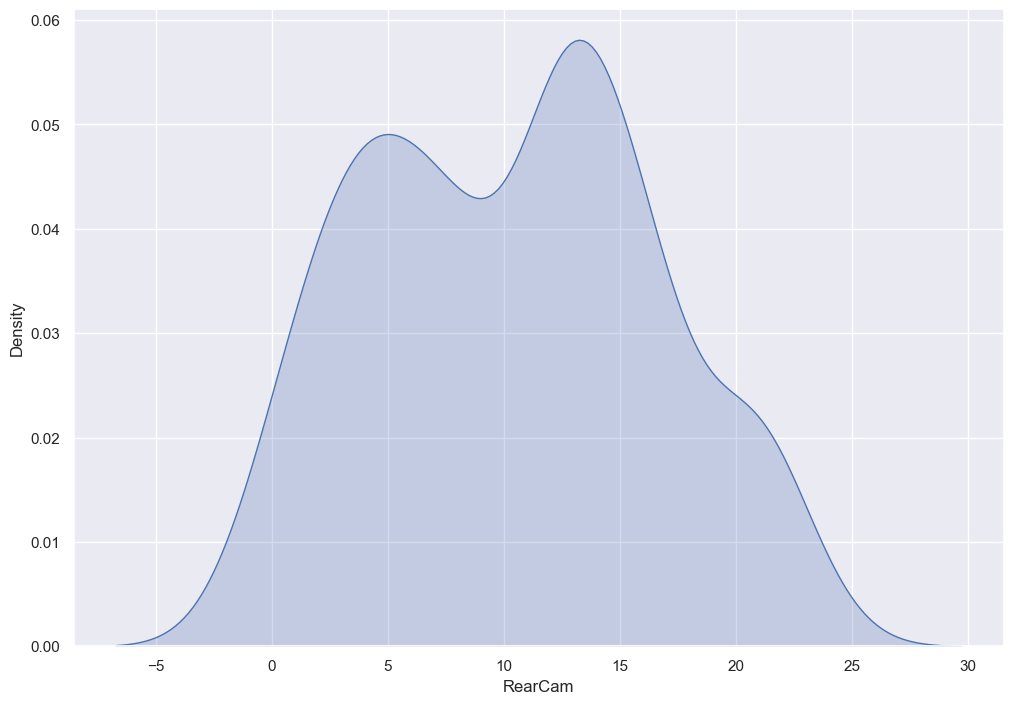

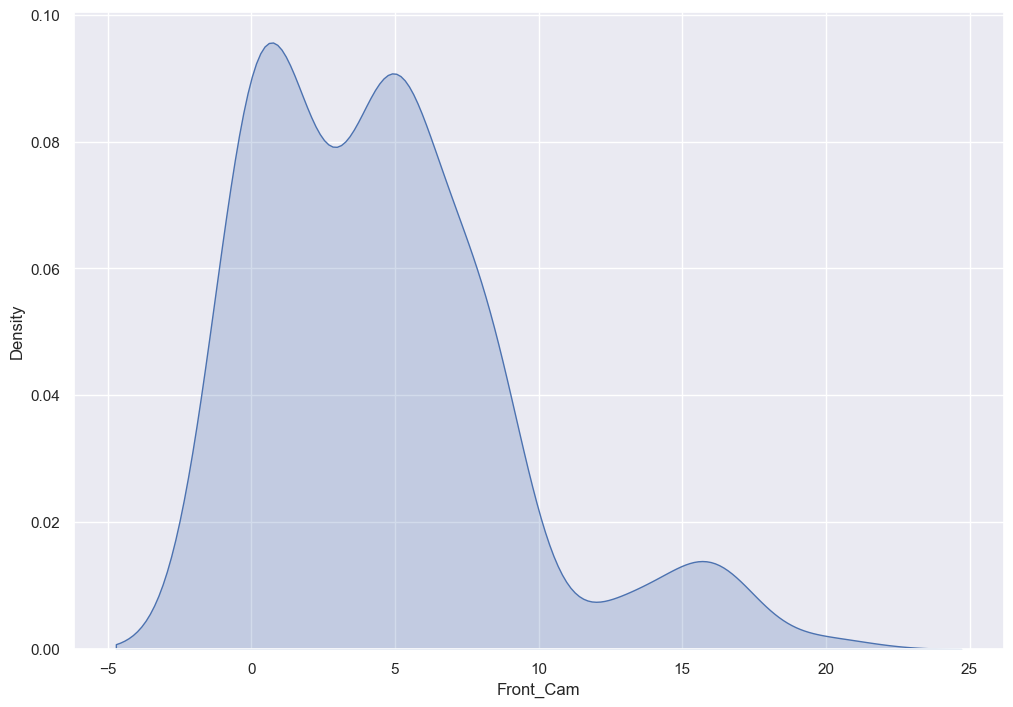

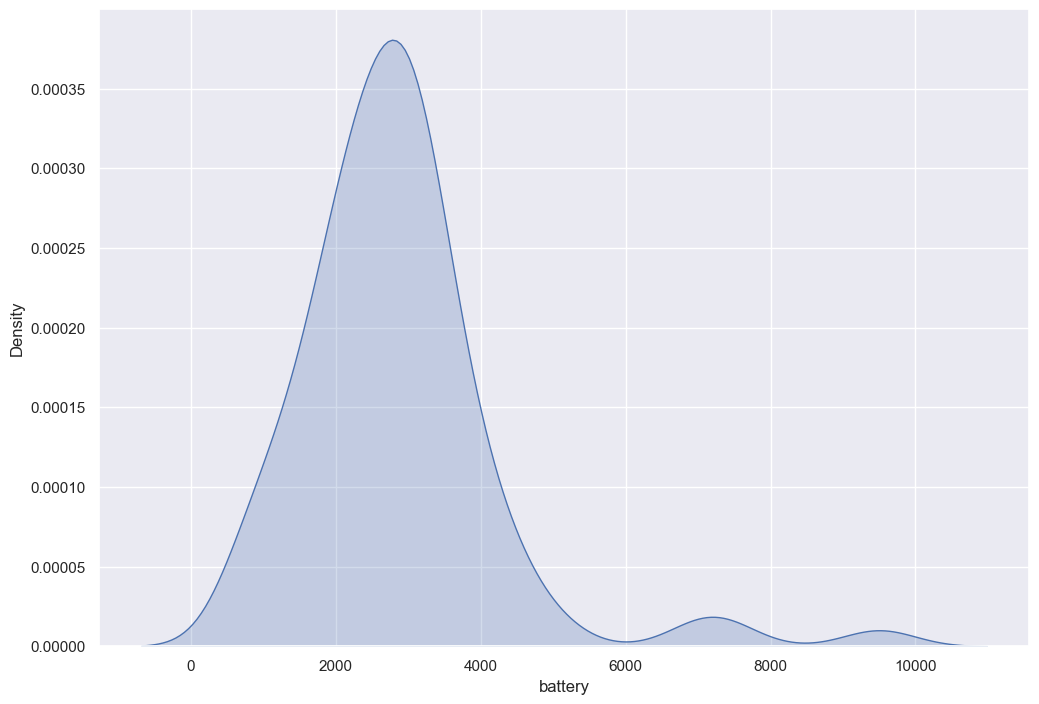

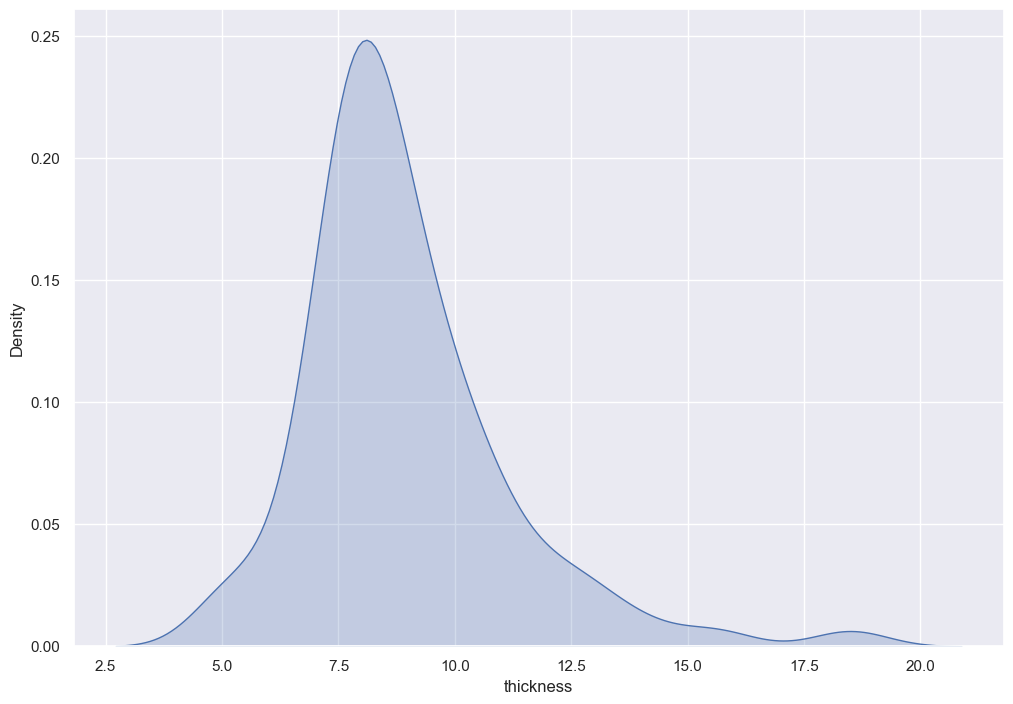

In [21]:
for i in columns:
    plt.figure()
    sb.kdeplot(shade=True, x=df[i])

The above charts show the density values of each of the phone properties. For example, most phone have a PPI of 225 - 400. 

Let's take a look at some colorful scatterplots.

In [27]:
columns2 = ['Sale', 'weight', 'resoloution', 'ppi','cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam','battery', 'thickness']
colorforx = ['Red', 'Blue', 'Green', 'Black', 'Orange', 'Purple', 'Red', 'Blue', 'Green', 'Red', 'Blue', 'Green']
colorchange = 0

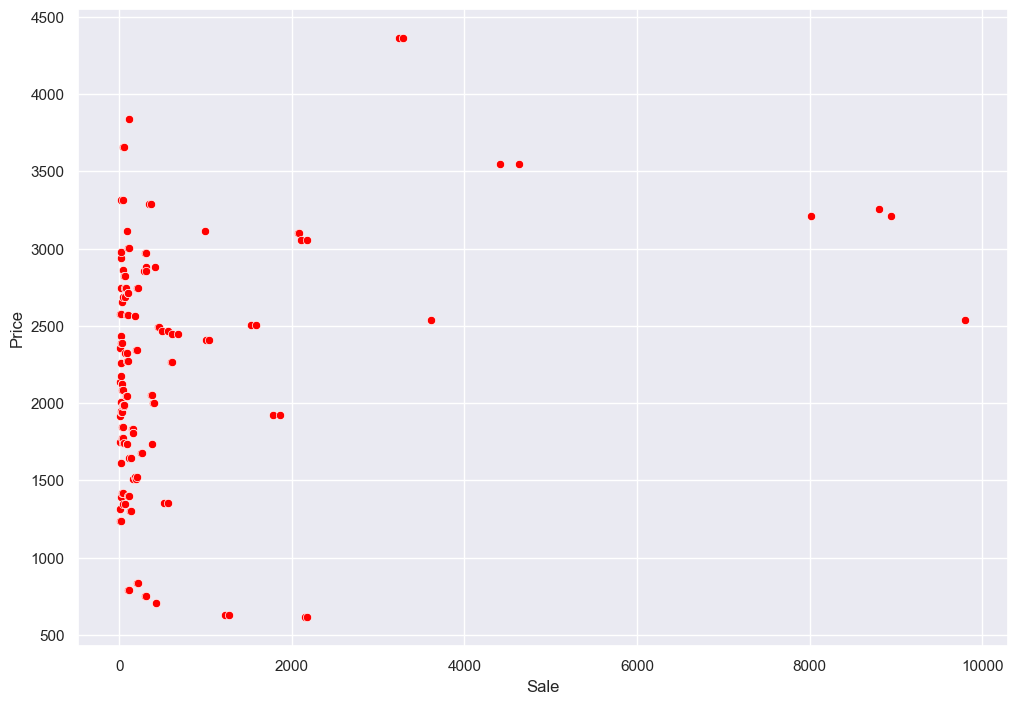

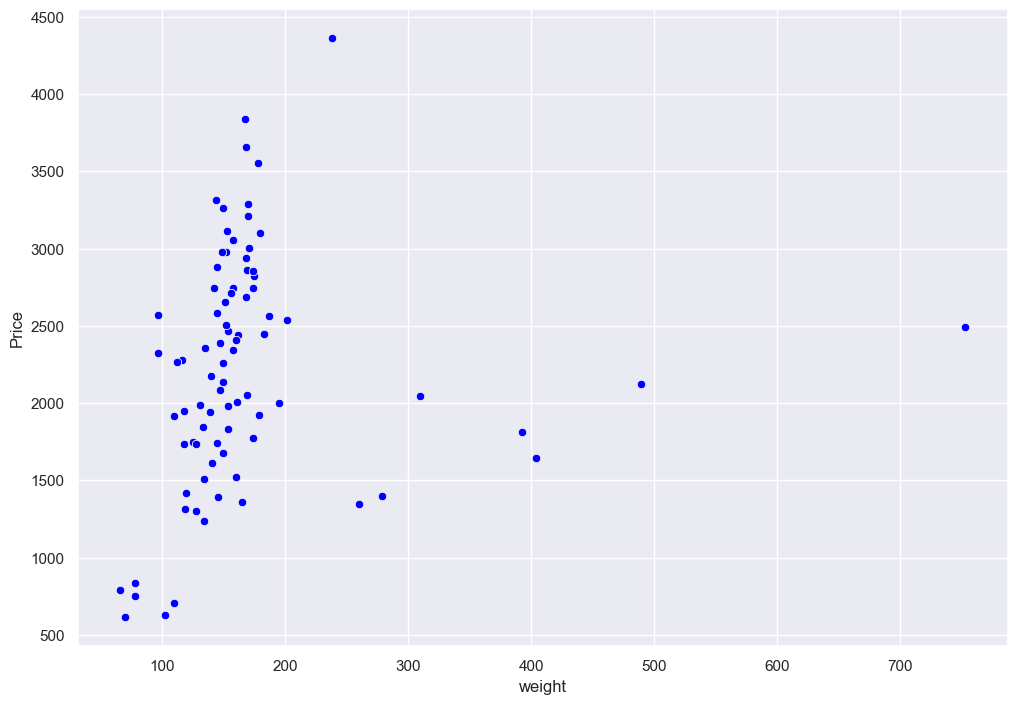

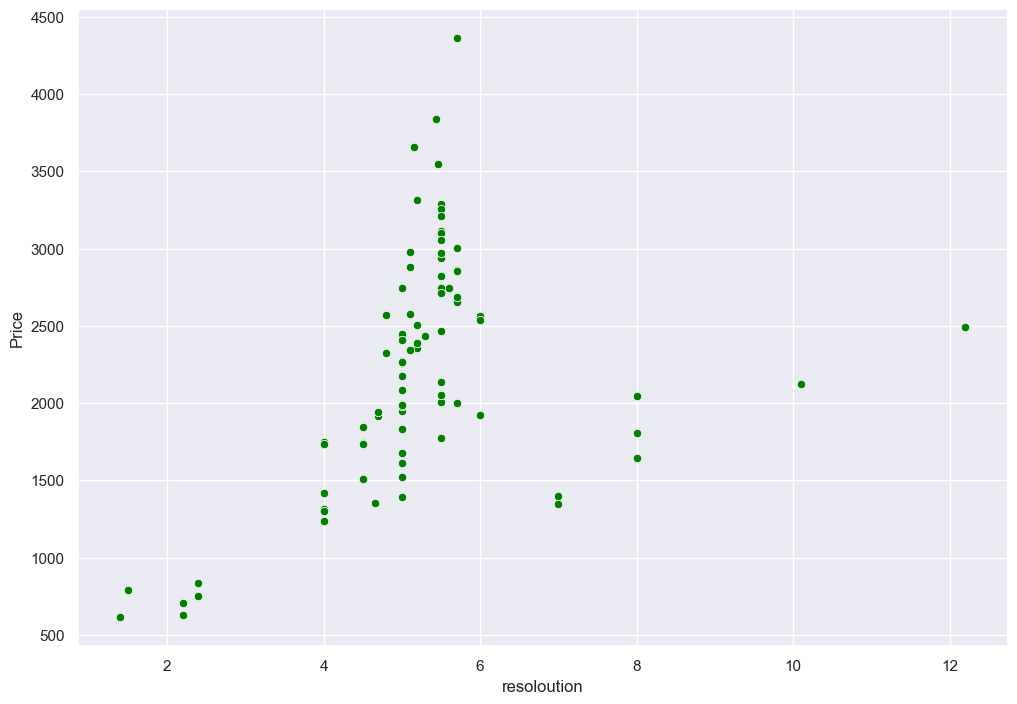

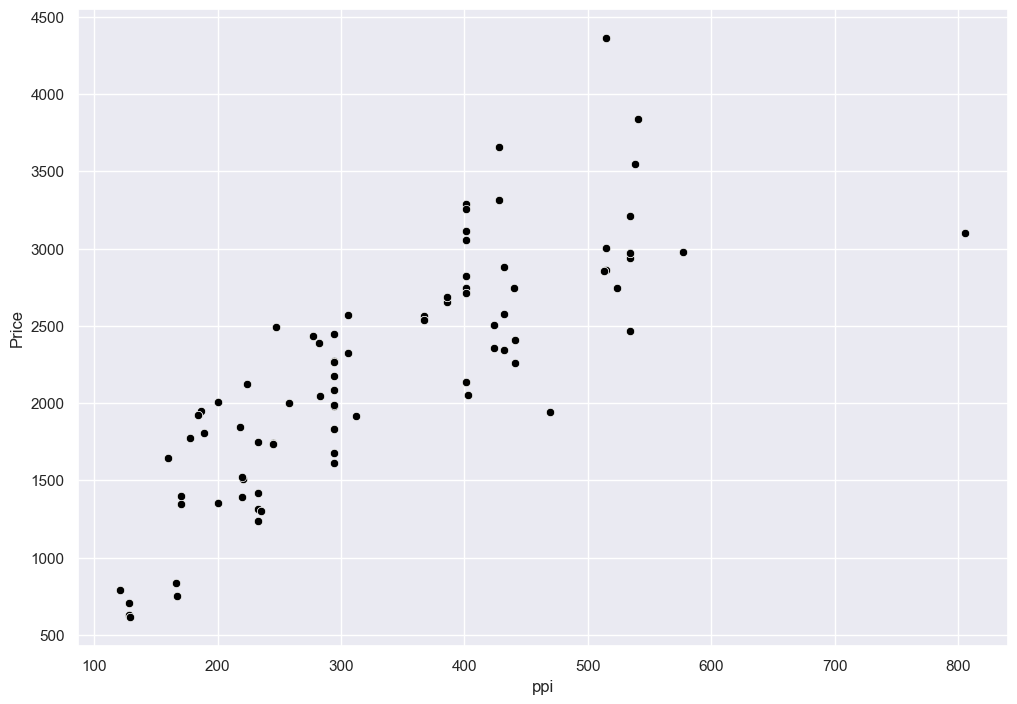

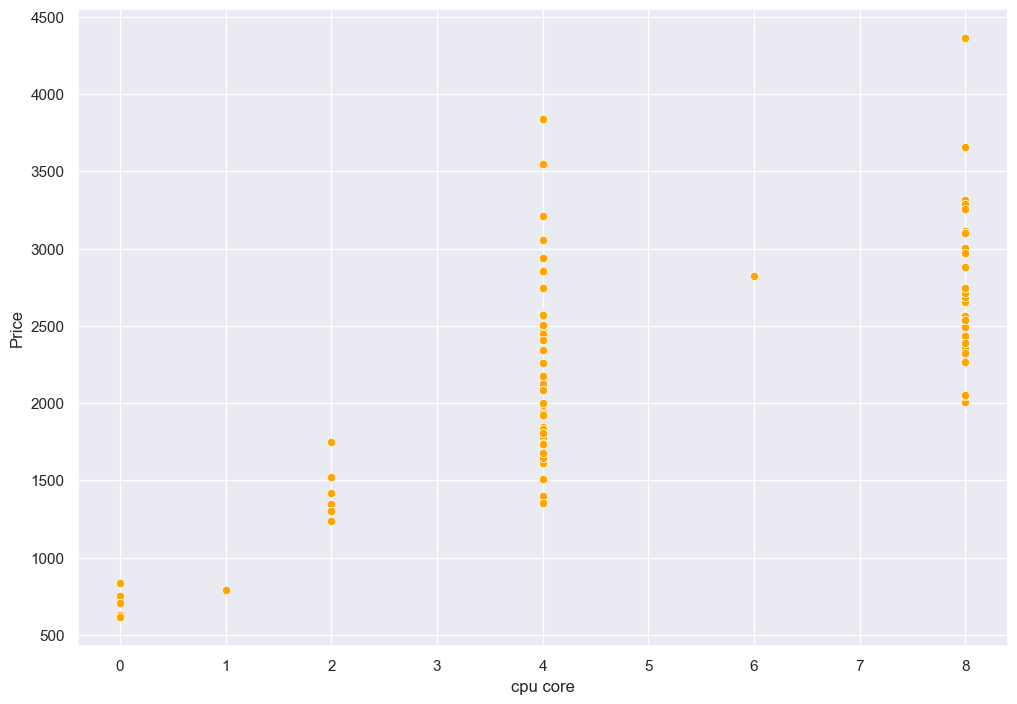

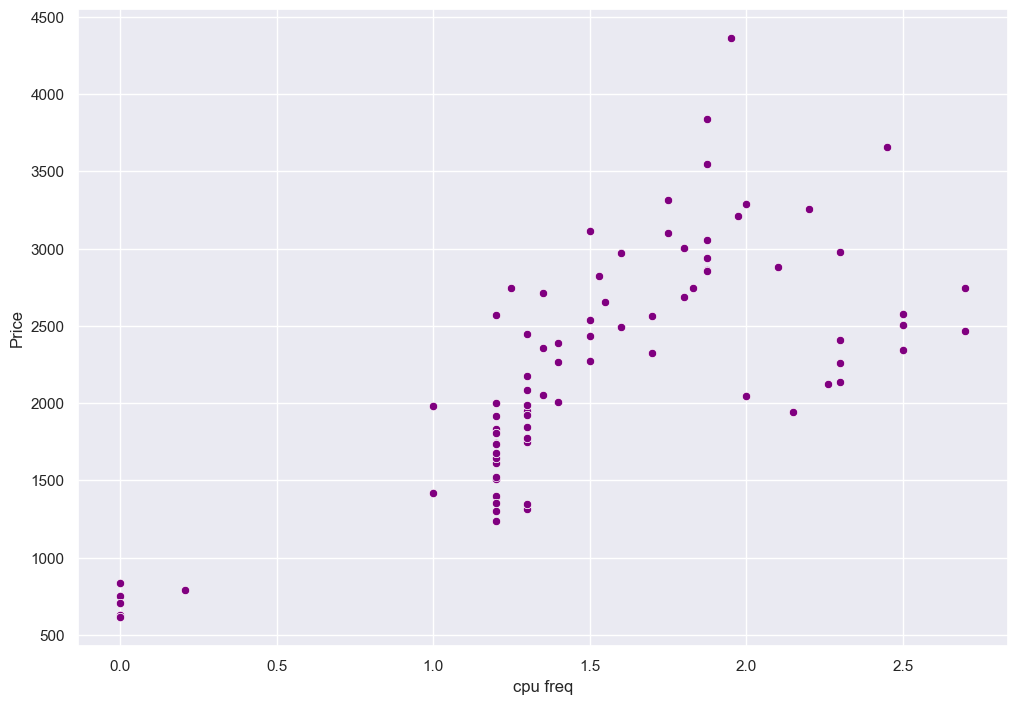

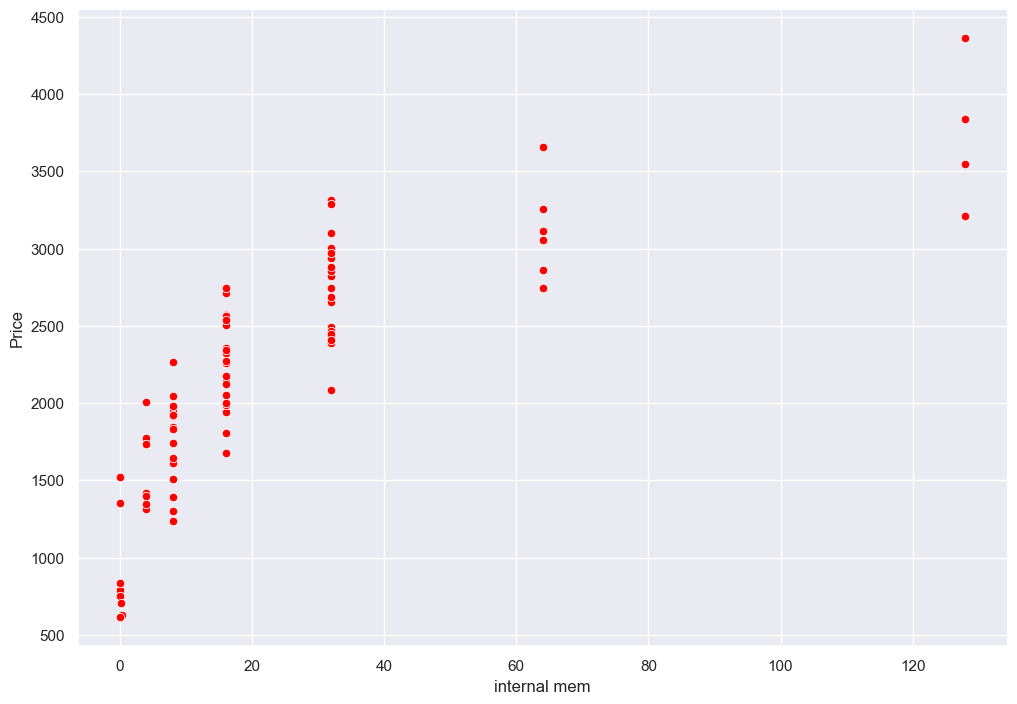

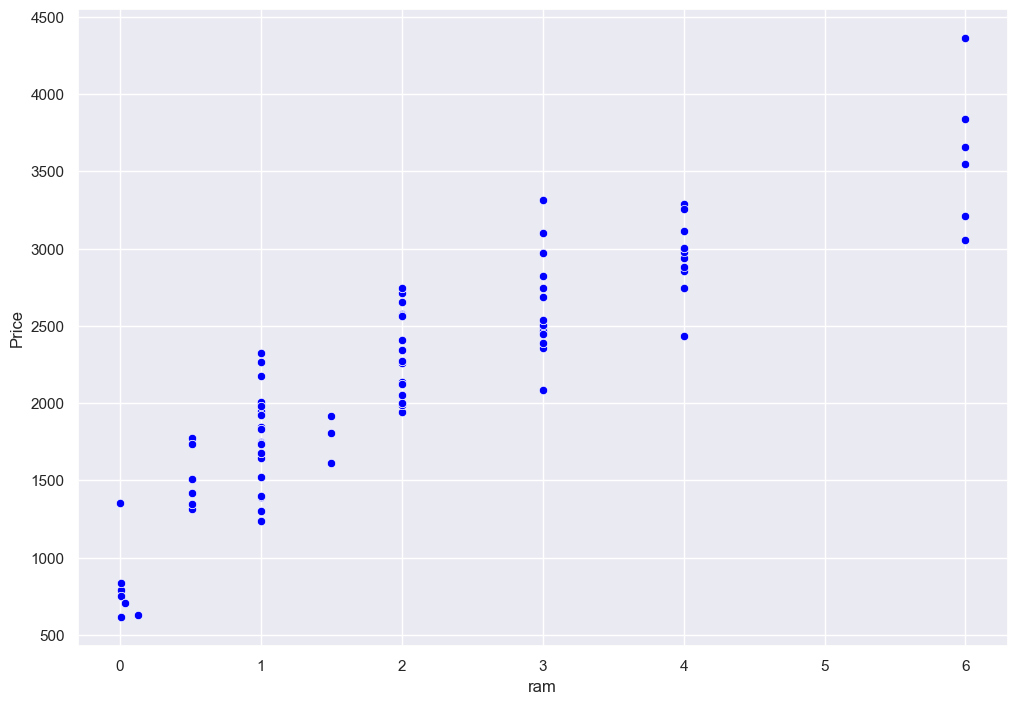

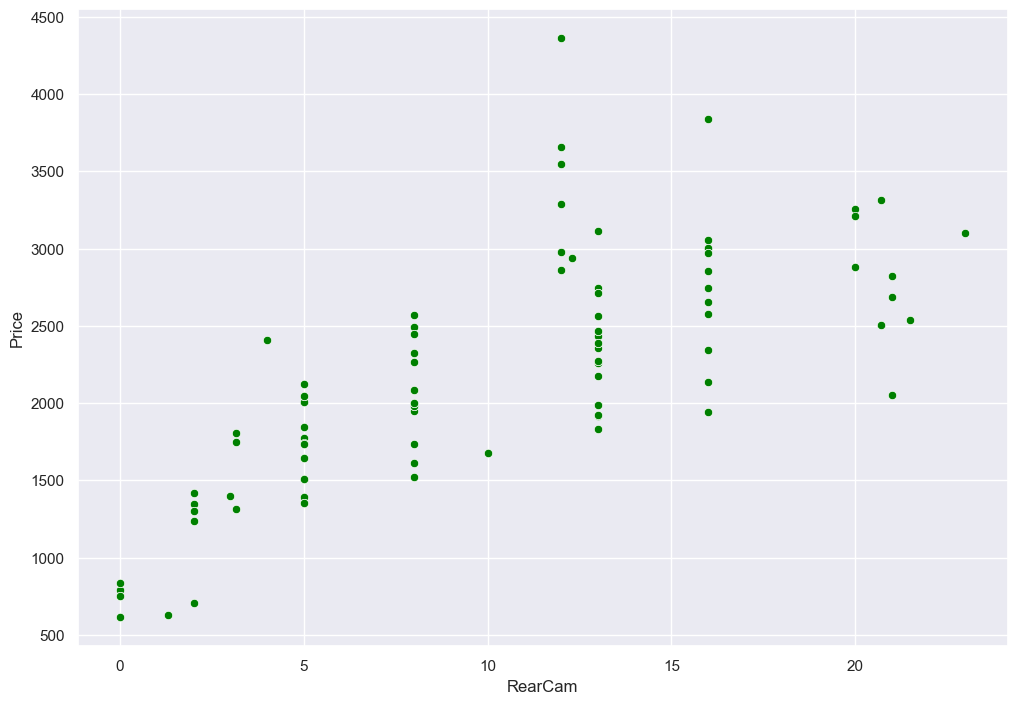

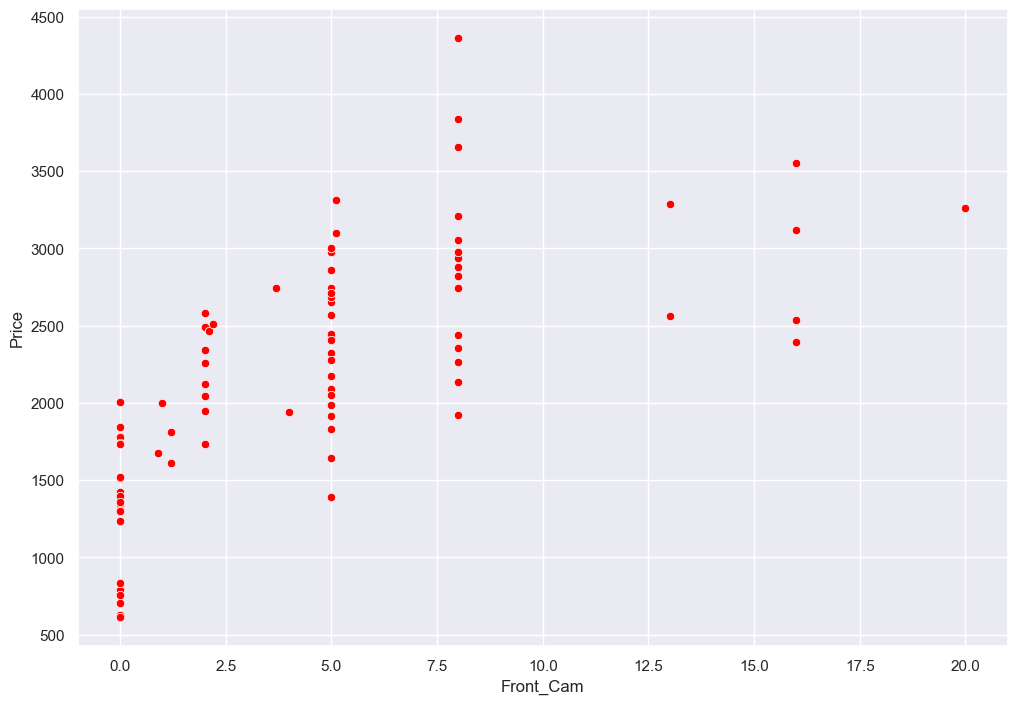

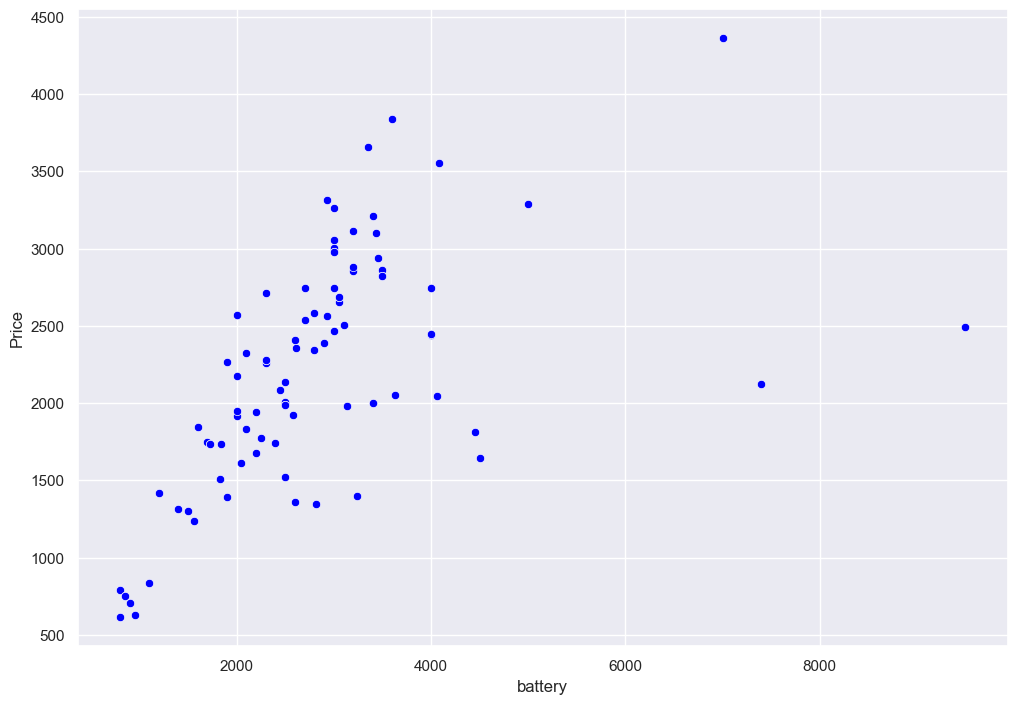

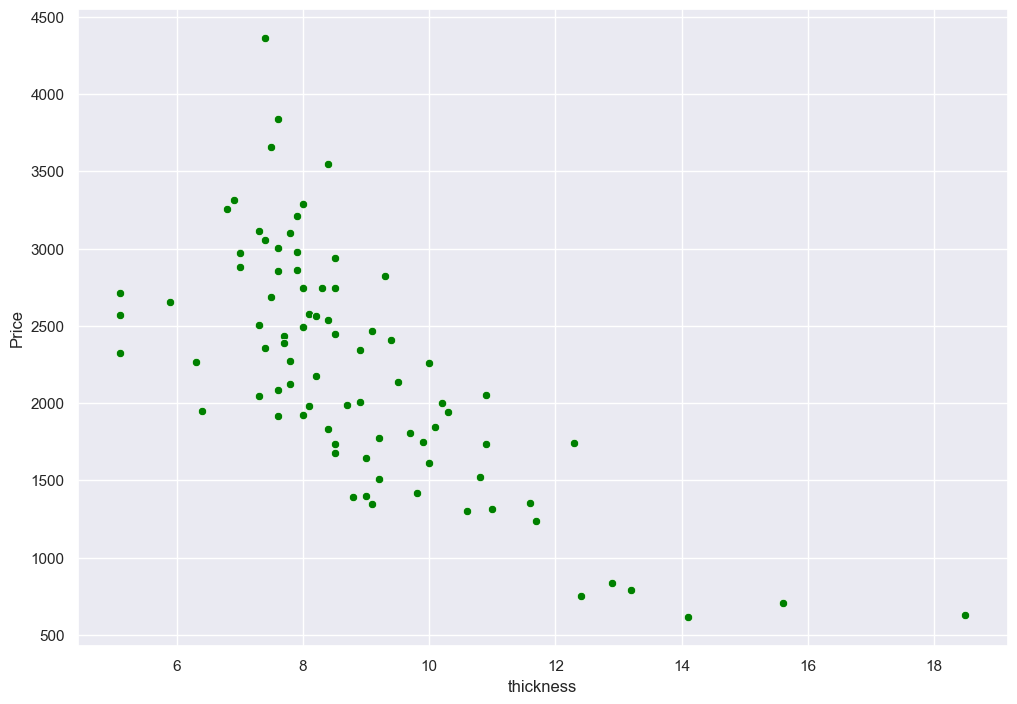

In [28]:
for i in columns2:
    sb.scatterplot(x = df[i], y = df['Price'], color = colorforx[colorchange])
    plt.show()
    colorchange += 1

                  

Lets look at a box plot for the phone prices.

In [65]:
df['Price'].describe()

count     161.000000
mean     2215.596273
std       768.187171
min       614.000000
25%      1734.000000
50%      2258.000000
75%      2744.000000
max      4361.000000
Name: Price, dtype: float64

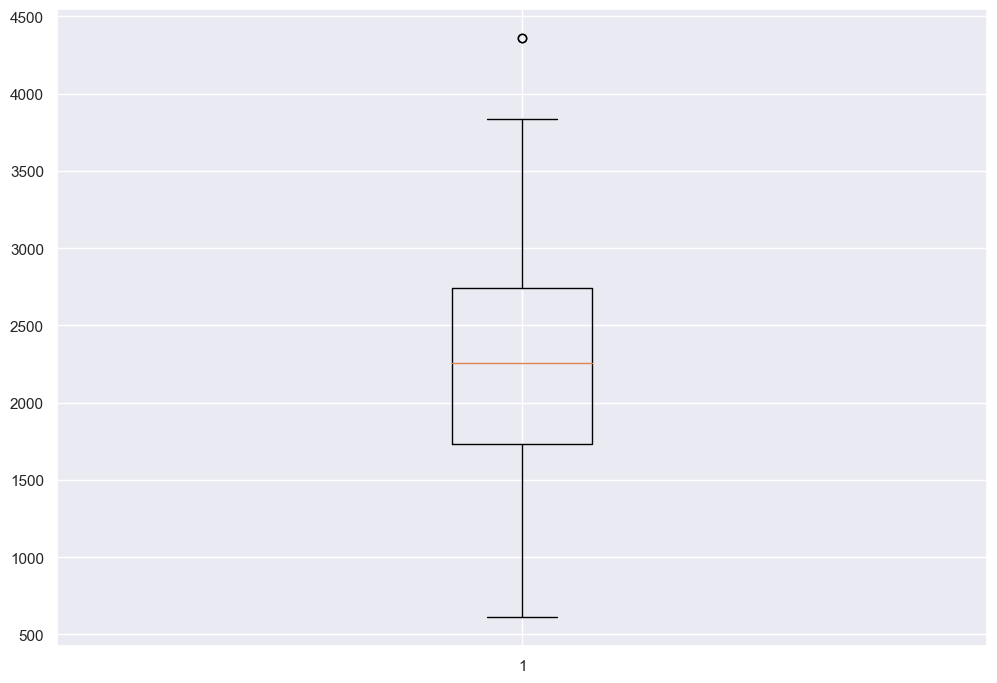

In [69]:
plt.boxplot(data = df, x = 'Price');